# Naive Bayes On Iris Dataset <br>
## Hi There




In [73]:
import pandas as pd
import requests
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [7]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
r = requests.get(url, allow_redirects=True)
open('iris.txt','wb').write(r.content)

In [20]:
header = ['sepal_length','sepal_width','petal_length','petal_width','names']
df = pd.read_csv('iris.txt',names = header,index_col =False)
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,names
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [26]:
X = df.iloc[:,:-1]
X.head(3)


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [47]:
y = (df.iloc[:,-1:])
y.head(3)

,names
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa


In [52]:
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size = 0.2, random_state = 0)
gnb = GaussianNB()

gnb.fit(X_train, np.ravel(y_train))
y_pred = gnb.predict(X_test)
accuracy_score(y_test,y_pred)


0.9666666666666667

## Parameter Tuning
### Now let see how less data are required to have good accuracy


In [72]:
test_proportion = np.arange(0.1,1.0,0.02)
accuracy_scores = []
for test_size in  test_proportion:
    X_train, X_test, y_train, y_test = train_test_split( X,y, test_size =test_size, random_state = 0)
    gnb = GaussianNB()
    gnb.fit(X_train, np.ravel(y_train))
    y_pred = gnb.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test,y_pred))
    train_set = (1-test_size)
    print('For train sample proportion of {0:.{1}f}, The accuracy is'.format(train_set,2),accuracy_score(y_test,y_pred))


For train sample proportion of 0.90, The accuracy is 0.9333333333333333
For train sample proportion of 0.88, The accuracy is 0.9444444444444444
For train sample proportion of 0.86, The accuracy is 0.9545454545454546
For train sample proportion of 0.84, The accuracy is 0.96
For train sample proportion of 0.82, The accuracy is 0.9642857142857143
For train sample proportion of 0.80, The accuracy is 0.9666666666666667
For train sample proportion of 0.78, The accuracy is 0.9705882352941176
For train sample proportion of 0.76, The accuracy is 0.9722222222222222
For train sample proportion of 0.74, The accuracy is 1.0
For train sample proportion of 0.72, The accuracy is 1.0
For train sample proportion of 0.70, The accuracy is 1.0
For train sample proportion of 0.68, The accuracy is 0.9591836734693877
For train sample proportion of 0.66, The accuracy is 0.9615384615384616
For train sample proportion of 0.64, The accuracy is 0.9636363636363636
For train sample proportion of 0.62, The accuracy i

<Figure size 432x288 with 0 Axes>

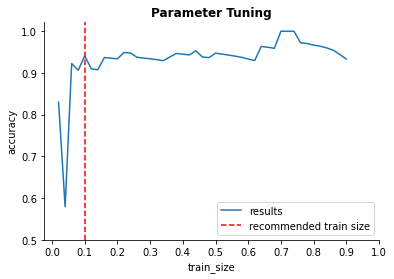

In [109]:
x = 1-test_proportion
y = accuracy_scores
plt.tight_layout()
fig = plt.figure()
ax = plt.axes()

ax.plot(x,y, label = 'results')
ax.axvline(x = 0.1,c = 'red', ls = '--',label='recommended train size')
ax.set_xlabel('train_size')
ax.set_ylabel('accuracy')
ax.set_xticks(ticks=np.arange(0,1.1,0.1))
ax.set_yticks(ticks=np.arange(0.5,1.05,0.1))
ax.set_title('Parameter Tuning',fontweight='bold')
ax.legend(loc='lower right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)